In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
data_path = "ner_dataset.csv"

data = pd.read_csv(data_path, encoding= 'unicode_escape')
data.fillna(method = 'ffill', inplace = True)
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [ ]:
ready_dist_path = "ner.csv"
ready_data = pd.read_csv(ready_dist_path)
ready_data.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [ ]:
def join_a_sentence(sentence_number):

    """
    Args.:
          sentence_number: sentence number we want to join and return.

    Returns:
          The joined sentence.
    """

    sentence_number = str(sentence_number)
    the_sentence_words_list = list(data[data['Sentence #'] == 'Sentence: {}'.format(sentence_number)]['Word'])

    return ' '.join(the_sentence_words_list)

In [ ]:
join_a_sentence(sentence_number = 1)

'Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .'

In [ ]:
join_a_sentence(sentence_number = 100)

'Helicopter gunships Saturday pounded militant hideouts in the Orakzai tribal region , where many Taliban militants are believed to have fled to avoid an earlier military offensive in nearby South Waziristan .'

In [ ]:
# Data Shape
data.shape

(1048575, 4)

In [ ]:
# Number of unique sentences
len(np.unique(data['Sentence #']))

47959

In [ ]:
print("Number of unique words in the dataset: {}".format(data.Word.nunique()))
print("Number of unique tags in the dataset: {}".format(data.Tag.nunique()))

Number of unique words in the dataset: 35178
Number of unique tags in the dataset: 17


In [ ]:
tags = data.Tag.unique()
tags

array(['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim',
       'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve',
       'I-eve', 'I-nat'], dtype=object)

In [ ]:
def num_words_tags (tags, data):

    """This functions takes the tags we want to count and the datafram
    and return a dict where the key is the tag and the value is the frequency
    of that tag"""

    tags_count = {}

    for tag in tags:
        len_tag = len(data[data['Tag'] == tag])
        tags_count[tag] = len_tag

    return tags_count

In [ ]:
tags_count = num_words_tags(tags, data)
tags_count

{'O': 887908,
 'B-geo': 37644,
 'B-gpe': 15870,
 'B-per': 16990,
 'I-geo': 7414,
 'B-org': 20143,
 'I-org': 16784,
 'B-tim': 20333,
 'B-art': 402,
 'I-art': 297,
 'I-per': 17251,
 'I-gpe': 198,
 'I-tim': 6528,
 'B-nat': 201,
 'B-eve': 308,
 'I-eve': 253,
 'I-nat': 51}

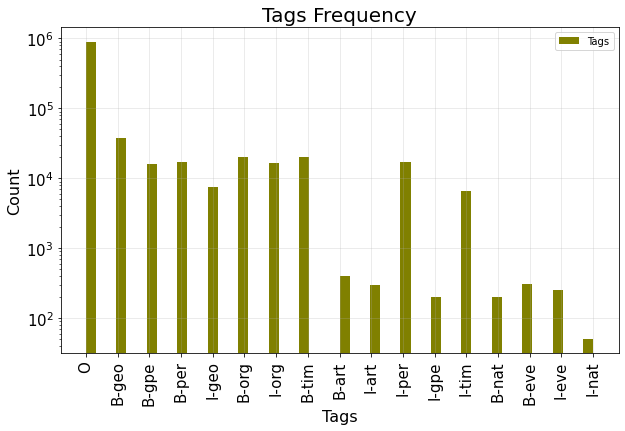

In [ ]:
plt.figure(figsize = (10, 6))
plt.hist(data.Tag, log = True, label = 'Tags', color = 'olive', bins = 50)
plt.xlabel('Tags', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title("Tags Frequency", fontsize = 20)
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
ready_data.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [ ]:
X = list(ready_data['Sentence'])
Y = list(ready_data['Tag'])

In [ ]:
from ast import literal_eval
Y_ready = []

for sen_tags in Y:
    Y_ready.append(literal_eval(sen_tags))

In [ ]:
print("First three sentences: \n")
print(X[:3])

First three sentences: 

['Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .', 'Families of soldiers killed in the conflict joined the protesters who carried banners with such slogans as " Bush Number One Terrorist " and " Stop the Bombings . "', 'They marched from the Houses of Parliament to a rally in Hyde Park .']


In [ ]:
print("First three Tags: \n")
print(Y_ready[:3])

First three Tags: 

[['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-per', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'I-geo', 'O']]


We need to tokenize the sentences by mapping each word to a unique identifier, then we need to pad them because NN need the input sentences to have the same lenght.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
print("Number of examples: {}".format(len(X)))

Number of examples: 47959


- **Toknize sentences**

In [ ]:
# cutoff reviews after 110 words
maxlen = 110

# consider the top 36000 words in the dataset
max_words = 36000

# tokenize each sentence in the dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [ ]:
word_index = tokenizer.word_index
print("Found {} unique tokens.".format(len(word_index)))
ind2word = dict([(value, key) for (key, value) in word_index.items()])

Found 27953 unique tokens.


In [ ]:
word2id = word_index

In [ ]:
# dict. that map each identifier to its word
id2word = {}
for key, value in word2id.items():
    id2word[value] = key

- **Sentences padding**

In [ ]:
# pad the sequences so that all sequences are of the same size
X_preprocessed = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [ ]:
# first example after tokenization and padding.
X_preprocessed[0]

array([ 260,    3,  997,   13, 1838,  245,  452,    4,  545,    1,  121,
          2,   60,    6,  595,    1,  861,    3,  184,   89,   21,   12,
         54,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [ ]:
# 22479 example after tokenization and padding.
X_preprocessed[22479]

array([ 9811,     2,   640,   454,  2760,   155,   944, 15986,  5319,
        1941,     3,    61,  4900,   155,  4877, 22425,  1941,    17,
       13036, 22426, 22427,     6,   699,   325,   428, 22428,  1941,
       13142, 13143, 22429, 22430,    47,   381,    25,  2859,   907,
       22431,  2166,     4,   155,  1229, 22432,  1941,     2,   754,
         629,     3,    61,  4899,   155,   975, 22433,  1941,    17,
       13036,     6,   699,   454,   428, 22434,  1941, 13142, 13143,
        1033,  1453,    21,     1,   257,  3560,    22,     1,  4417,
           3,     1,  5701,     3,  3783,  2111,  1028,  1243, 22435,
          61,  6936,  2197,  3486,     1,   135,  1185,   257,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0], dtype=int32)

- **Preprocess tags**

In [ ]:
# dict. that map each tag to its identifier
tags2id = {}
for i, tag in enumerate(tags):
    tags2id[tag] = i

In [ ]:
tags2id

{'O': 0,
 'B-geo': 1,
 'B-gpe': 2,
 'B-per': 3,
 'I-geo': 4,
 'B-org': 5,
 'I-org': 6,
 'B-tim': 7,
 'B-art': 8,
 'I-art': 9,
 'I-per': 10,
 'I-gpe': 11,
 'I-tim': 12,
 'B-nat': 13,
 'B-eve': 14,
 'I-eve': 15,
 'I-nat': 16}

In [ ]:
# dict. that map each identifier to its tag
id2tag = {}
for key, value in tags2id.items():
    id2tag[value] = key

In [ ]:
id2tag

{0: 'O',
 1: 'B-geo',
 2: 'B-gpe',
 3: 'B-per',
 4: 'I-geo',
 5: 'B-org',
 6: 'I-org',
 7: 'B-tim',
 8: 'B-art',
 9: 'I-art',
 10: 'I-per',
 11: 'I-gpe',
 12: 'I-tim',
 13: 'B-nat',
 14: 'B-eve',
 15: 'I-eve',
 16: 'I-nat'}

In [ ]:
def preprocess_tags(tags2id, Y_ready):

    Y_preprocessed = []
    maxlen = 110
    # for each target
    for y in Y_ready:

        # place holder to store the new preprocessed tag list
        Y_place_holder = []

        # for each tag in rhe tag list
        for tag in y:
            # append the id of the tag in the place holder list
            Y_place_holder.append(tags2id[tag])

        # find the lenght of the new preprocessed tag list
        len_new_tag_list = len(Y_place_holder)
        # find the differance in length between the len of tag list and padded sentences
        num_O_to_add = maxlen - len_new_tag_list

        # add 'O's to padd the tag lists
        padded_tags = Y_place_holder + ([tags2id['O']] * num_O_to_add)
        Y_preprocessed.append(padded_tags)

    return Y_preprocessed

In [ ]:
Y_preprocessed = preprocess_tags(tags2id, Y_ready)

In [ ]:
print(Y_preprocessed[0])

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(Y_ready[0])

['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


- **Data shuffling and splitting**

In [ ]:
print("The Lenght of training examples: {}".format(len(X_preprocessed)))
print("The Lenght of training targets: {}".format(len(Y_preprocessed)))

The Lenght of training examples: 47959
The Lenght of training targets: 47959


In [ ]:
X_preprocessed = np.asarray(X_preprocessed)
Y_preprocessed = np.asarray(Y_preprocessed)

In [ ]:
# 70% of the datat will be used for training
training_samples = 0.7
# 15% of the datat will be used for validation
validation_samples = 0.15
# 15% of the datat will be used for testing
testing_samples = 0.15

In [ ]:
indices = np.arange(len(Y_preprocessed))

In [ ]:
np.random.seed(seed=555)
np.random.shuffle(indices)

In [ ]:
X_preprocessed = X_preprocessed[indices]
Y_preprocessed = Y_preprocessed[indices]

In [ ]:
X_train = X_preprocessed[: int(0.7 * len(X_preprocessed))]
print("Number of training examples: {}".format(len(X_train)))


X_val = X_preprocessed[int(0.7 * len(X_preprocessed)) : int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1)]
print("Number of validation examples: {}".format(len(X_val)))


X_test = X_preprocessed[int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1) : ]
print("Number of testing examples: {}".format(len(X_test)))



Y_train = Y_preprocessed[: int(0.7 * len(X_preprocessed))]
Y_val = Y_preprocessed[int(0.7 * len(X_preprocessed)) : int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1)]
Y_test = Y_preprocessed[int(0.7 * len(X_preprocessed)) + (int(0.15 * len(X_preprocessed)) + 1) : ]

print("Total number of examples after shuffling and splitting: {}".format(len(X_train) + len(X_val) + len(X_test)))

Number of training examples: 33571
Number of validation examples: 7194
Number of testing examples: 7194
Total number of examples after shuffling and splitting: 47959


In [ ]:
X_train[1000]

array([ 374,   19,    1,  254,   28, 1072,    6,   11, 1201,   59,  412,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [ ]:
Y_train[1000]

array([5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

2022-01-15 16:43:07.070690: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 16:43:07.169002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 16:43:07.169725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 16:43:07.172157: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [ ]:
BATCH_SIZE = 132
SHUFFLE_BUFFER_SIZE = 132

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
embedding_dim = 300
maxlen = 110
max_words = 36000
num_tags = len(tags)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(num_tags, activation='softmax'))
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 110, 300)          10800000  
_________________________________________________________________
bidirectional (Bidirectional (None, 110, 200)          320800    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 110, 200)          240800    
_________________________________________________________________
time_distributed (TimeDistri (None, 110, 17)           3417      
Total params: 11,365,017
Trainable params: 11,365,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=15)

Epoch 1/15


2022-01-15 16:43:14.798737: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-15 16:43:16.042343: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


255/255 [==============================] - 19s 51ms/step - loss: 0.1815 - accuracy: 0.9659 - val_loss: 0.1118 - val_accuracy: 0.9706
Epoch 2/15
255/255 [==============================] - 12s 46ms/step - loss: 0.0935 - accuracy: 0.9735 - val_loss: 0.0785 - val_accuracy: 0.9765
Epoch 3/15
255/255 [==============================] - 12s 46ms/step - loss: 0.0674 - accuracy: 0.9785 - val_loss: 0.0702 - val_accuracy: 0.9787
Epoch 4/15
255/255 [==============================] - 12s 46ms/step - loss: 0.0562 - accuracy: 0.9810 - val_loss: 0.0665 - val_accuracy: 0.9797
Epoch 5/15
255/255 [==============================] - 12s 47ms/step - loss: 0.0480 - accuracy: 0.9834 - val_loss: 0.0656 - val_accuracy: 0.9803
Epoch 6/15
255/255 [==============================] - 12s 46ms/step - loss: 0.0418 - accuracy: 0.9854 - val_loss: 0.0698 - val_accuracy: 0.9805
Epoch 7/15
255/255 [==============================] - 12s 46ms/step - loss: 0.0373 - accuracy: 0.9870 - val_loss: 0.0729 - val_accuracy: 0.9807
Epo

In [ ]:
model.evaluate(test_dataset)

55/55 [==============================] - 1s 18ms/step - loss: 0.1029 - accuracy: 0.9806


[0.10285092890262604, 0.980560839176178]

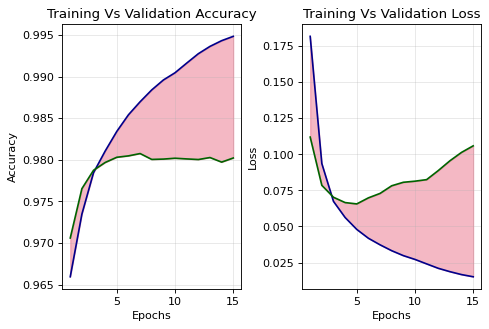

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(6, 4), dpi=80)

ax[0].plot(epochs, acc, label = "Training Accuracy", color='darkblue')
ax[0].plot(epochs, val_acc, label = "Validation Accuracy", color='darkgreen')
ax[0].grid(alpha=0.3)
ax[0].title.set_text('Training Vs Validation Accuracy')
ax[0].fill_between(epochs, acc, val_acc, color='crimson', alpha=0.3)
plt.setp(ax[0], xlabel='Epochs')
plt.setp(ax[0], ylabel='Accuracy')


ax[1].plot(epochs, loss, label = "Training Loss", color='darkblue')
ax[1].plot(epochs, val_loss, label = "Validation Loss", color='darkgreen')
ax[1].grid(alpha=0.3)
ax[1].title.set_text('Training Vs Validation Loss')
ax[1].fill_between(epochs,loss, val_loss, color='crimson', alpha=0.3)
plt.setp(ax[1], xlabel='Epochs')
plt.setp(ax[1], ylabel='Loss')

plt.show()

In [ ]:
def make_prediction(model, preprocessed_sentence, id2word, id2tag):

    #if preprocessed_sentence.shape() != (1, 110):
    preprocessed_sentence = preprocessed_sentence.reshape((1, 110))

    # return preprocessed sentence to its orginal form
    sentence = preprocessed_sentence[preprocessed_sentence > 0]
    word_list = []
    for word in list(sentence):
        word_list.append(id2word[word])
    orginal_sententce = ' '.join(word_list)

    len_orginal_sententce = len(word_list)

    # make prediction
    prediction = model.predict(preprocessed_sentence)
    prediction = np.argmax(prediction[0], axis=1)

    # return the prediction to its orginal form
    prediction = list(prediction)[ : len_orginal_sententce]

    pred_tag_list = []
    for tag_id in prediction:
        pred_tag_list.append(id2tag[tag_id])

    return orginal_sententce,  pred_tag_list

In [ ]:
orginal_sententce,  pred_tag_list = make_prediction(model=model,
                                                    preprocessed_sentence=X_test[520],
                                                    id2word=id2word,
                                                    id2tag=id2tag)

In [ ]:
print(orginal_sententce)

tuesday the manhattan new york city prosecutor unsealed a multi count indictment against china based limmt economic and trade company and li fang wei one of the firm 's managers


In [ ]:
print(pred_tag_list)

['B-tim', 'O', 'O', 'B-geo', 'O', 'I-geo', 'I-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-art', 'O', 'I-per', 'O', 'O', 'O', 'O', 'O', 'O']
